# 波士顿房价数据集导入，处理及可视化

## 数据导入 预处理及分析

In [14]:
# 导入Python的数据处理库pandas, 相当于python里的excel
import pandas as pd

#导入python高级数据可视化库seaborn
import seaborn as sns

# 导入python绘图matplotlib
import matplotlib.pyplot as plt

#使用ipython的魔法方法, 将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

#设置绘图大小
plt.style.use({'figure.figsize':(25,20)}) # 给画的图指定大小, 长25, 宽20

#这两个用来显示中文字符
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [18]:
df_chinese = pd.read_csv(r"C:\Users\LX\Desktop\boston_house_price_Chinese.csv",encoding='gbk')
df_english = pd.read_csv(r"C:\Users\LX\Desktop\boston_house_price_english.csv")

In [20]:
df_chinese.head()

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比,房价中位数
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
df_chinese.shape

(506, 14)

In [76]:
df_chinese.dtypes #检查数据类型

犯罪率                    float64
住宅用地所占比例               float64
城镇中非商业用地所占比例           float64
是否处于查尔斯河边                int64
一氧化碳浓度                 float64
住宅房间数                  float64
1940年以前建成的业主自住单位的占比    float64
距离波士顿5个商业中心的加权平均距离     float64
距离高速公路的便利指数              int64
不动产权税                    int64
学生/教师比例                float64
黑人比例                   float64
低收入阶层占比                float64
房价中位数                  float64
dtype: object

In [78]:
df_chinese.info() #检查有无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   犯罪率                  506 non-null    float64
 1   住宅用地所占比例             506 non-null    float64
 2   城镇中非商业用地所占比例         506 non-null    float64
 3   是否处于查尔斯河边            506 non-null    int64  
 4   一氧化碳浓度               506 non-null    float64
 5   住宅房间数                506 non-null    float64
 6   1940年以前建成的业主自住单位的占比  506 non-null    float64
 7   距离波士顿5个商业中心的加权平均距离   506 non-null    float64
 8   距离高速公路的便利指数          506 non-null    int64  
 9   不动产权税                506 non-null    int64  
 10  学生/教师比例              506 non-null    float64
 11  黑人比例                 506 non-null    float64
 12  低收入阶层占比              506 non-null    float64
 13  房价中位数                506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [63]:
df_chinese.isnull().any().sum()

0

In [80]:
df_chinese.describe() #可检查每一列数据的统计特征

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比,房价中位数
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [82]:
df_english.corr() #皮尔森相关系数

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## 数据可视化

In [112]:
# 设置绘图大小
plt.style.use({'figure.figsize':(15,10)})

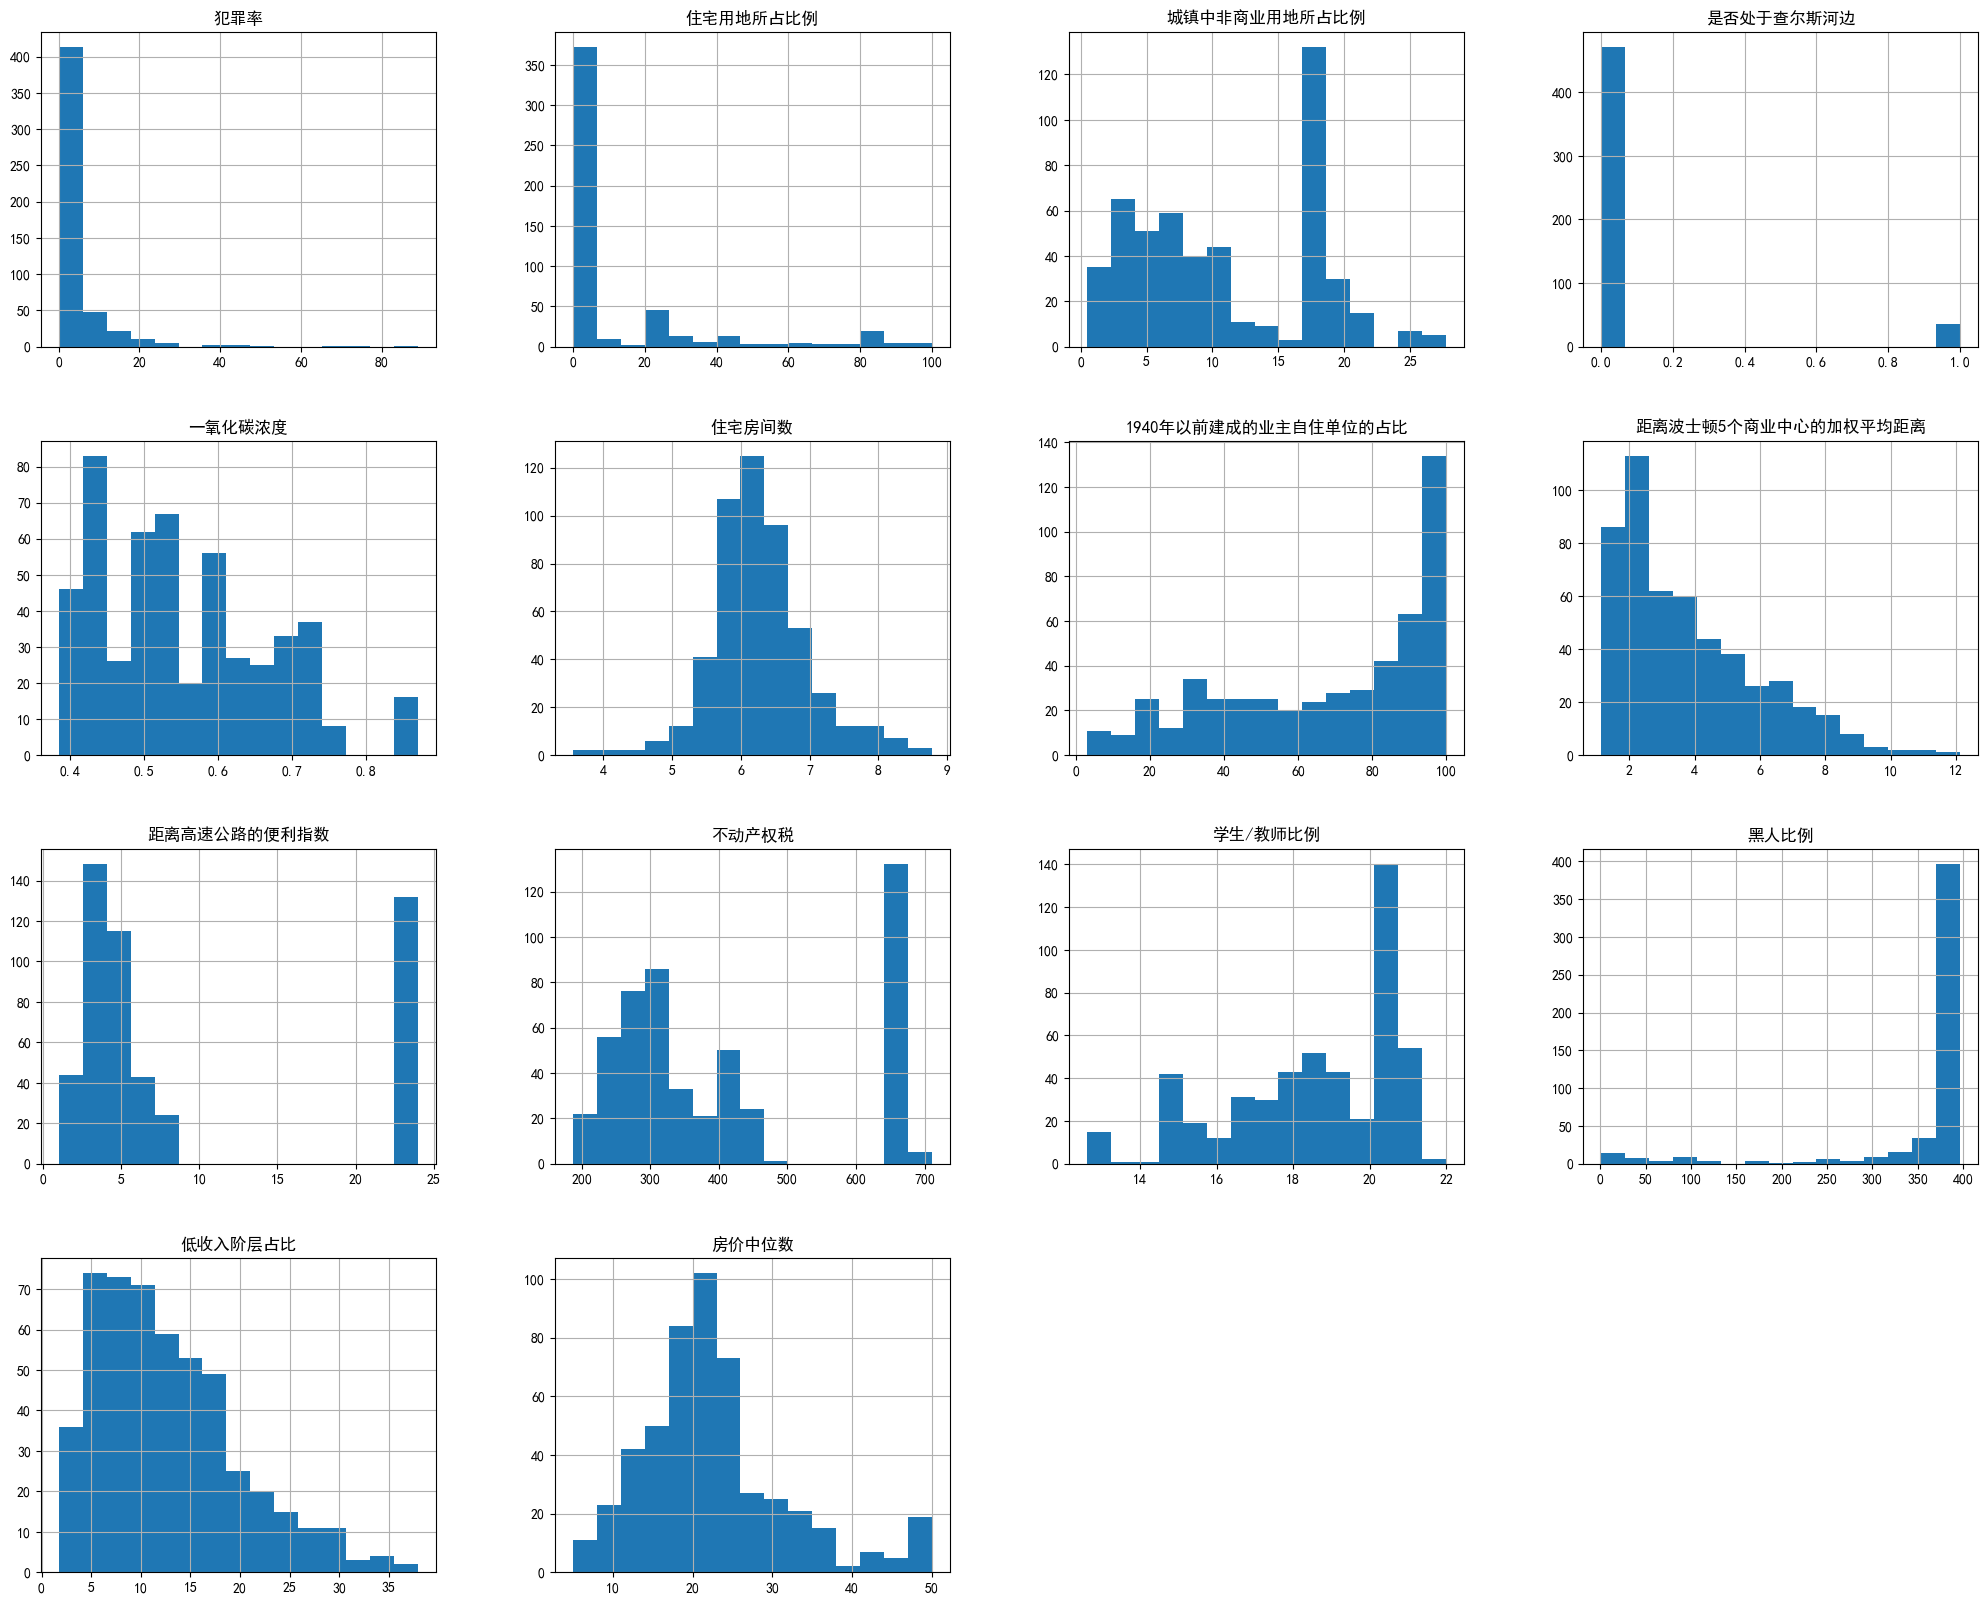

In [29]:
# 画出直方图
df_chinese.hist(bins=15) 
plt.show() 

In [ ]:
# 绘制变量之间两两相关的散点图，检查变量之间相关性
sns.pairplot(df_english)
plt.show() 

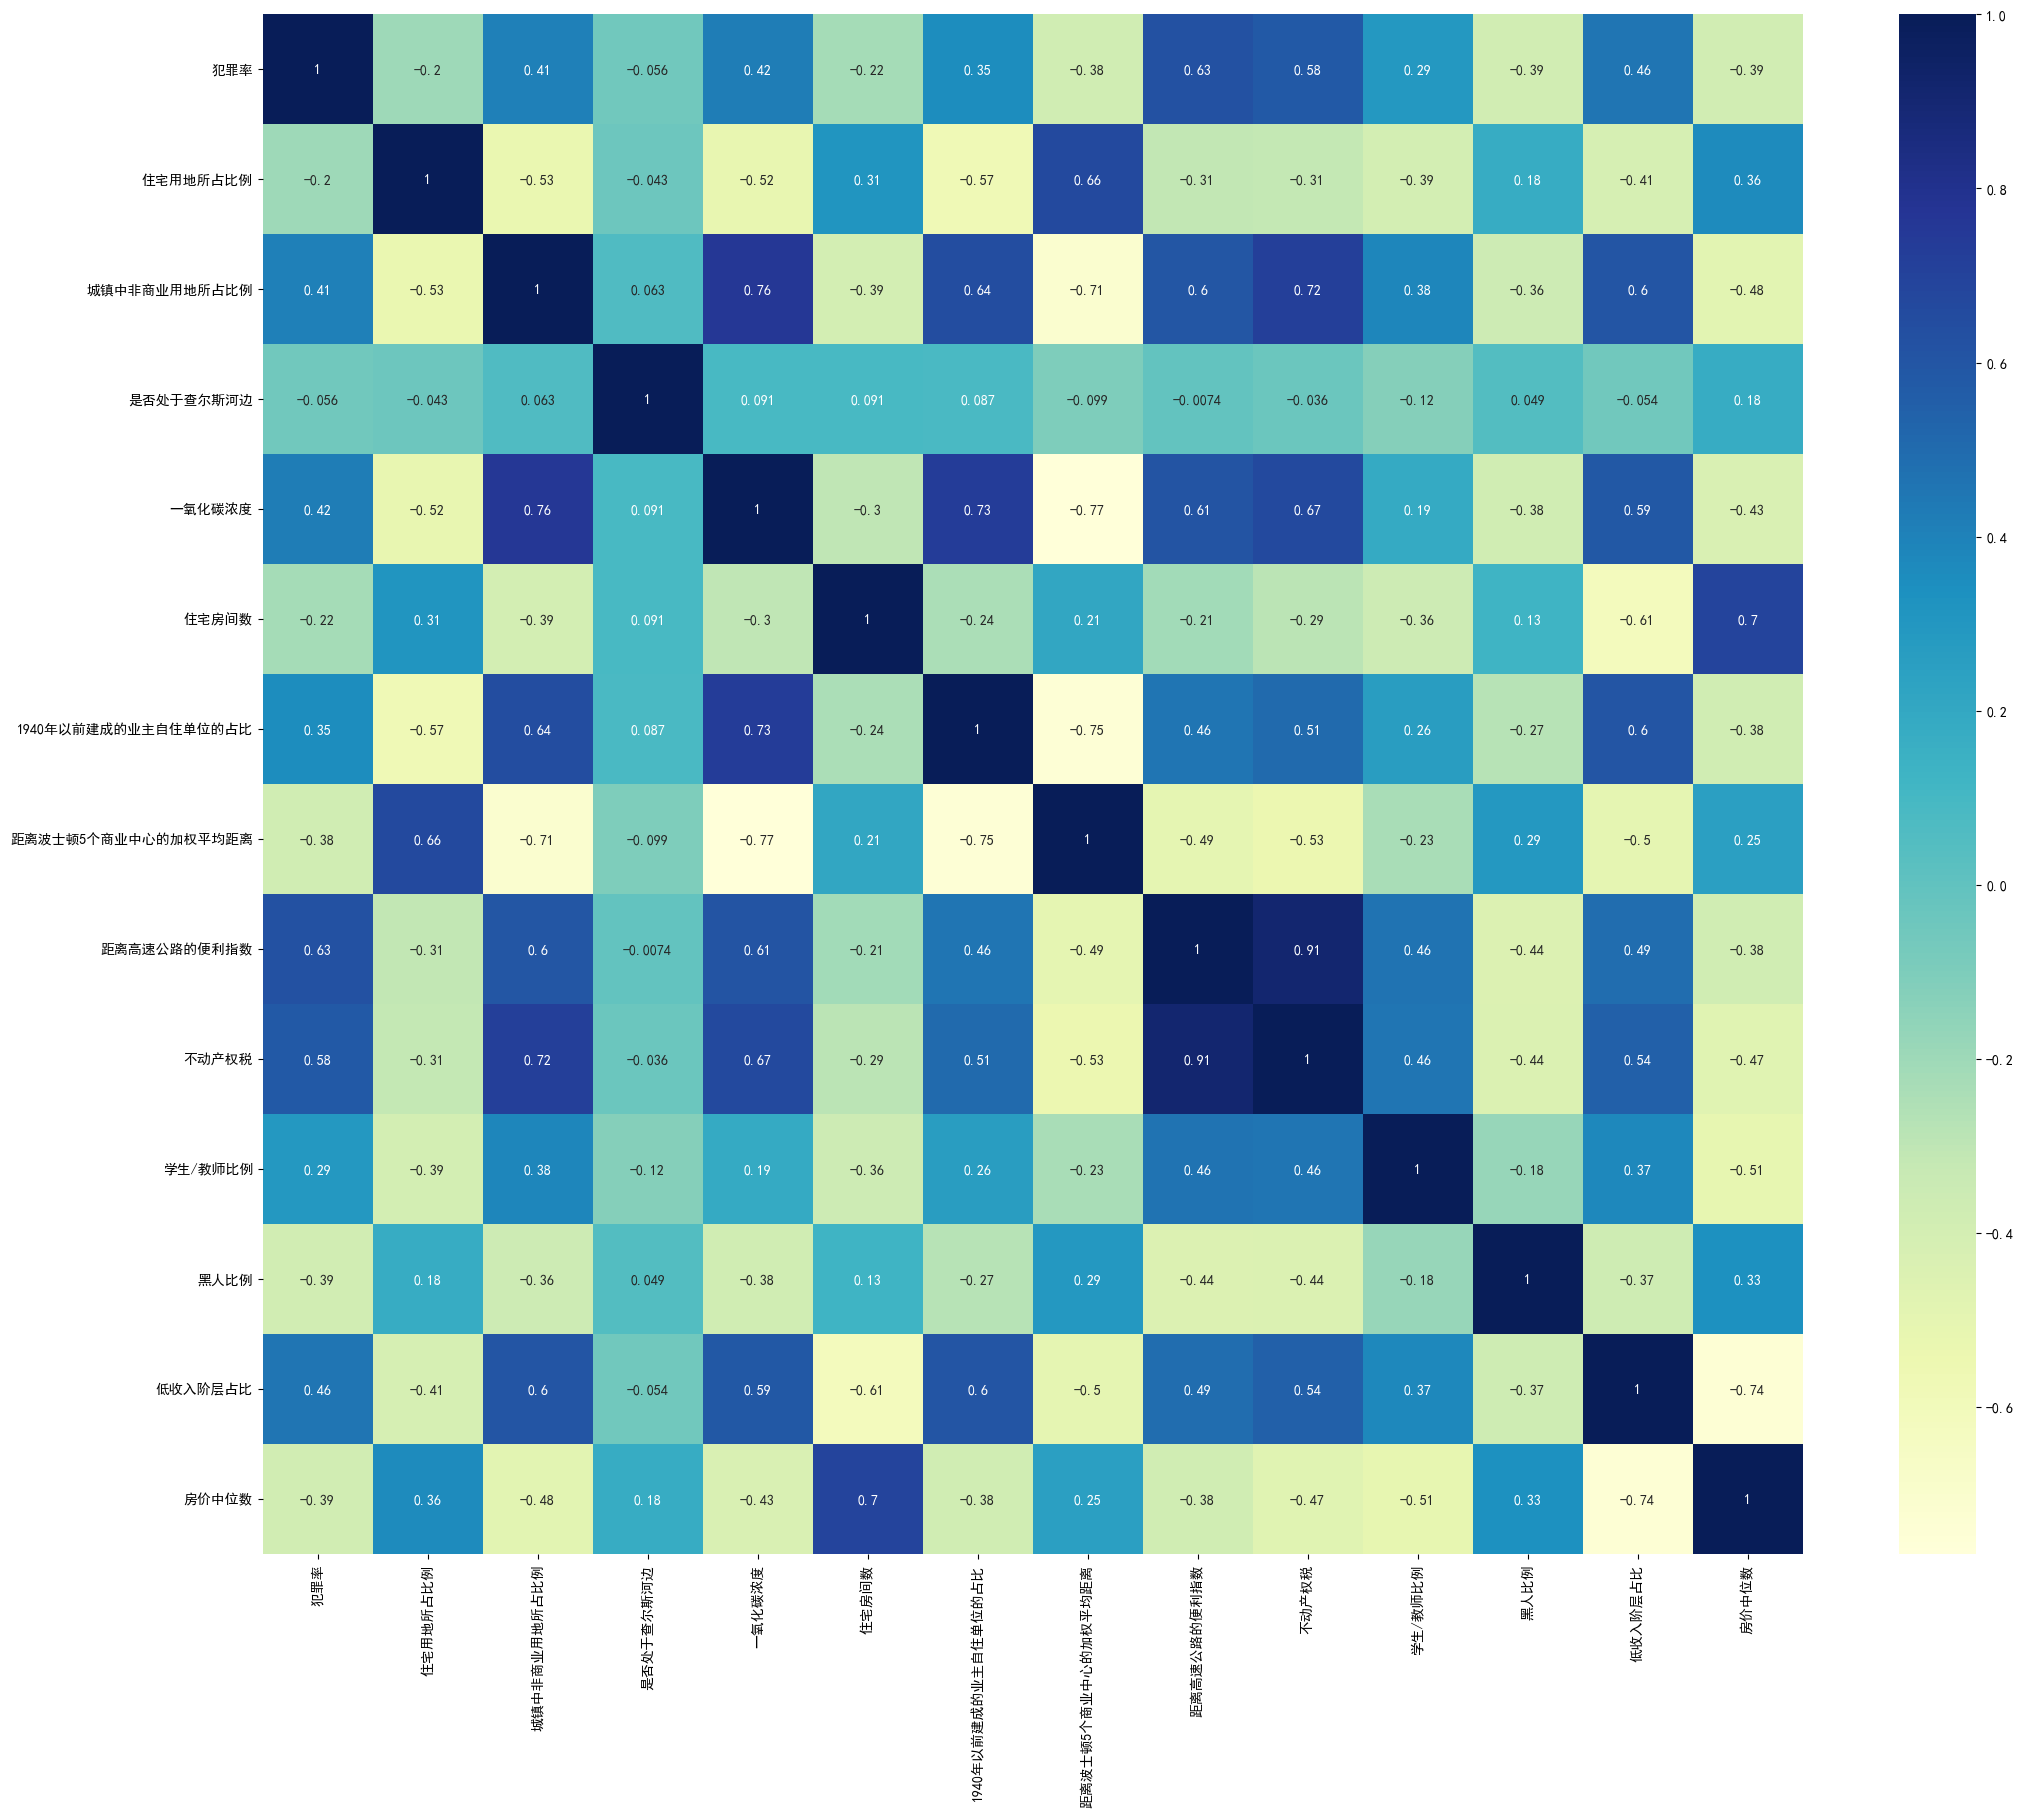

In [26]:
# 热力图  14个特征中两两变量之间的皮尔森相关系数，检查变量之间相关性
sns.heatmap(df_chinese.corr(),square=True,annot=True,cmap='YlGnBu') 
plt.show()  

In [181]:
# 设置绘图大小
plt.style.use({'figure.figsize':(10,8)})

In [185]:
df_chinese.columns

Index(['犯罪率', '住宅用地所占比例', '城镇中非商业用地所占比例', '是否处于查尔斯河边', '一氧化碳浓度', '住宅房间数',
       '1940年以前建成的业主自住单位的占比', '距离波士顿5个商业中心的加权平均距离', '距离高速公路的便利指数', '不动产权税',
       '学生/教师比例', '黑人比例', '低收入阶层占比', '房价中位数'],
      dtype='object')

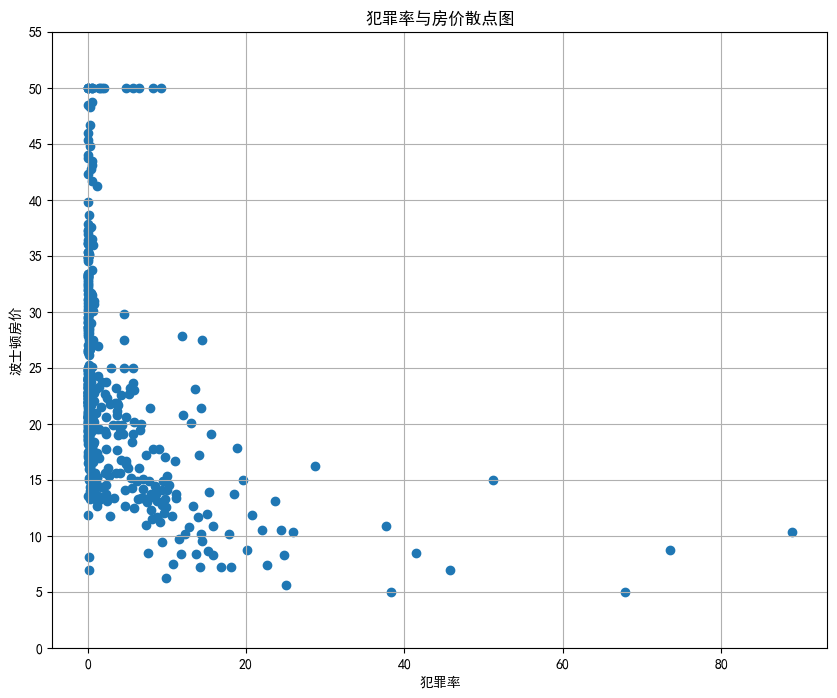

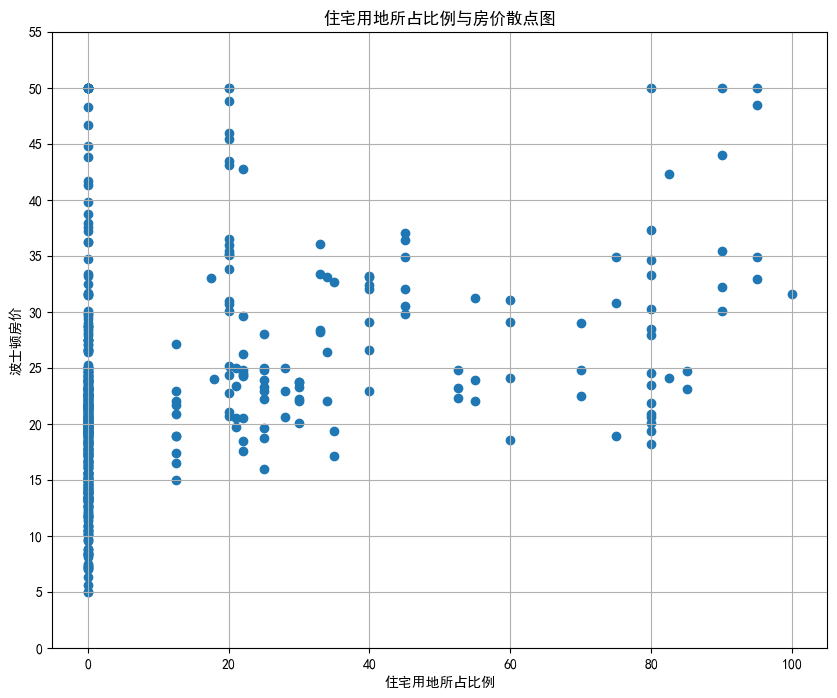

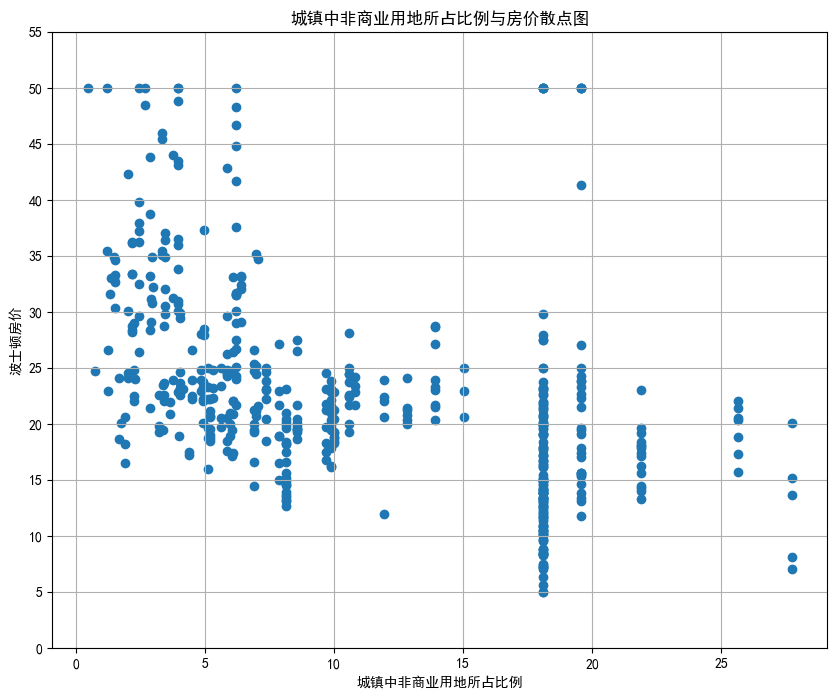

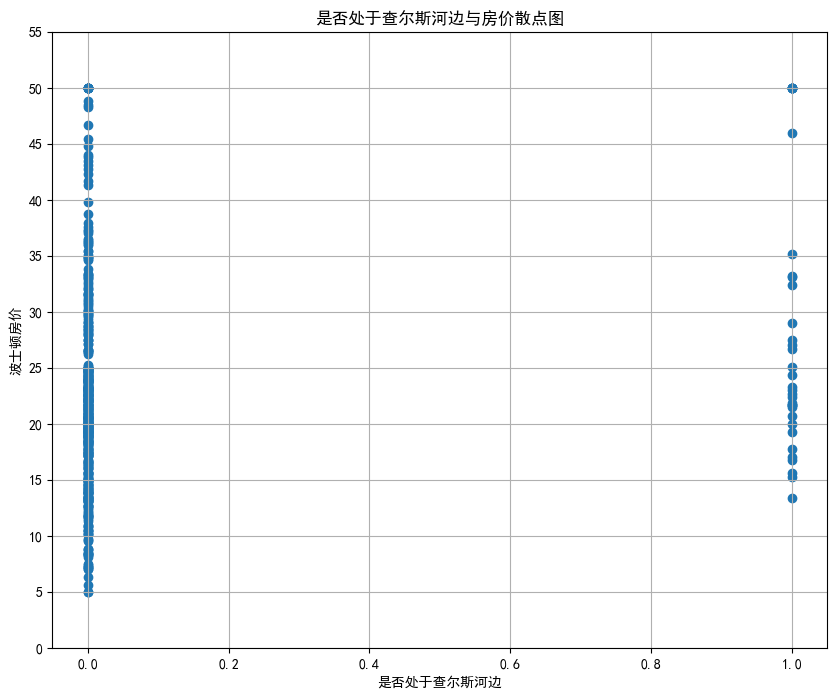

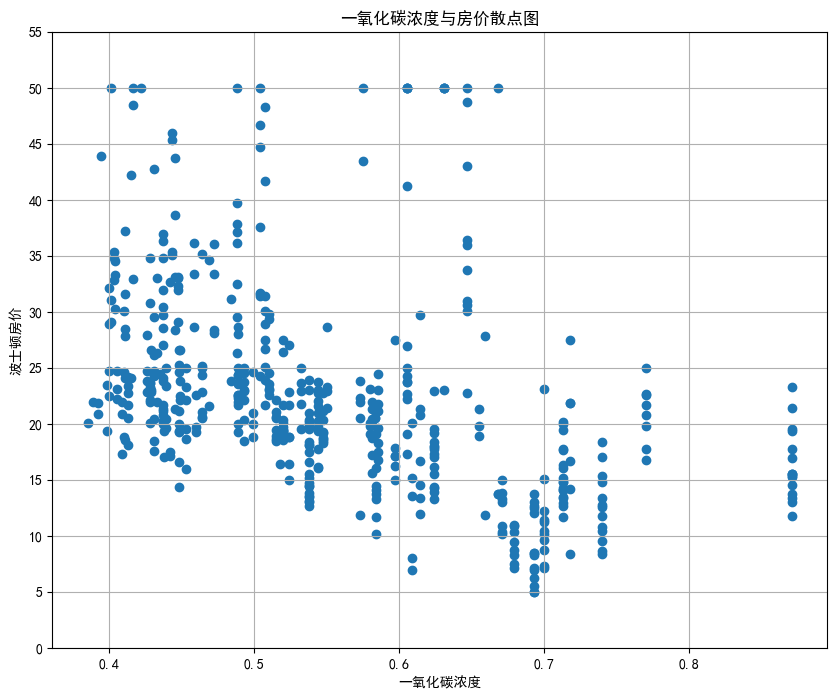

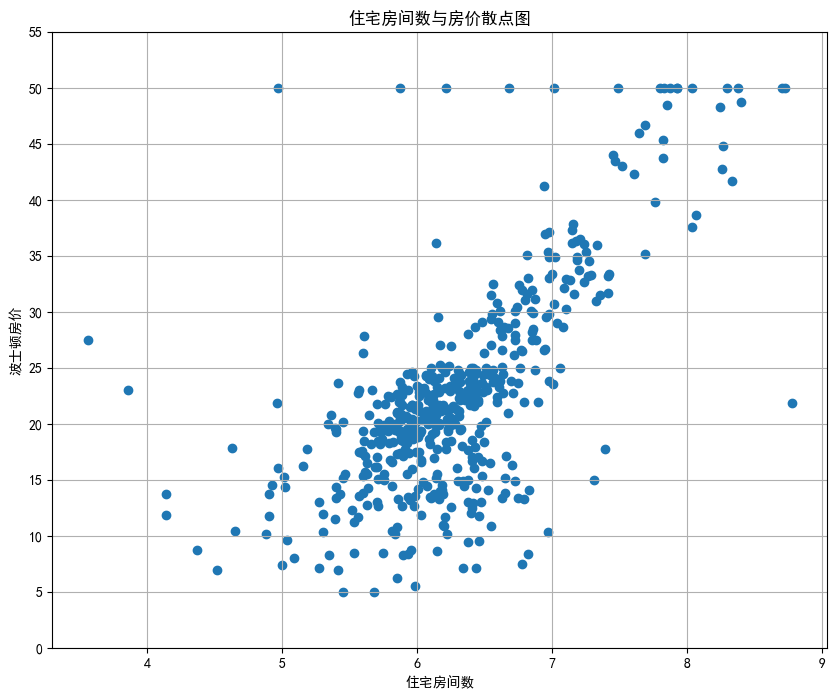

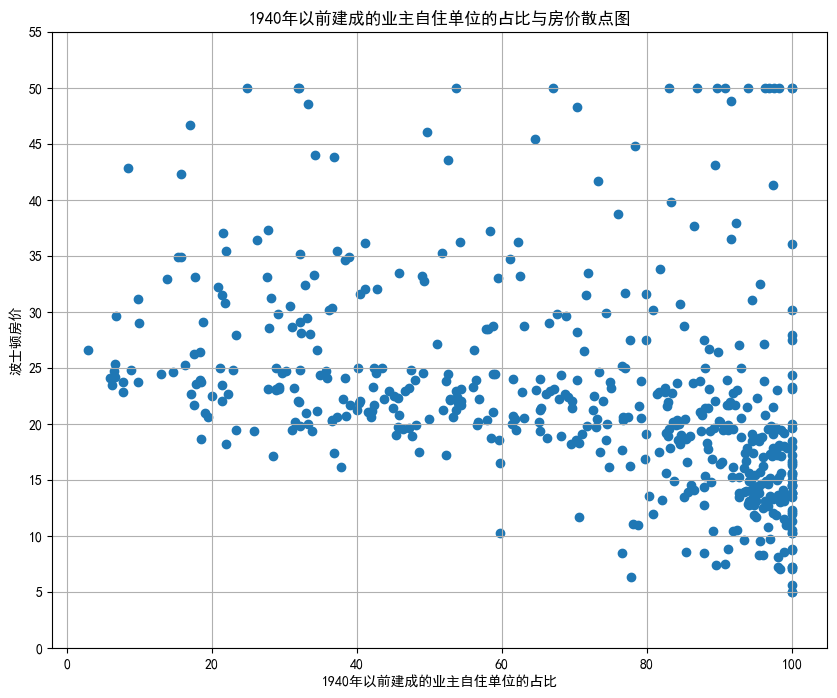

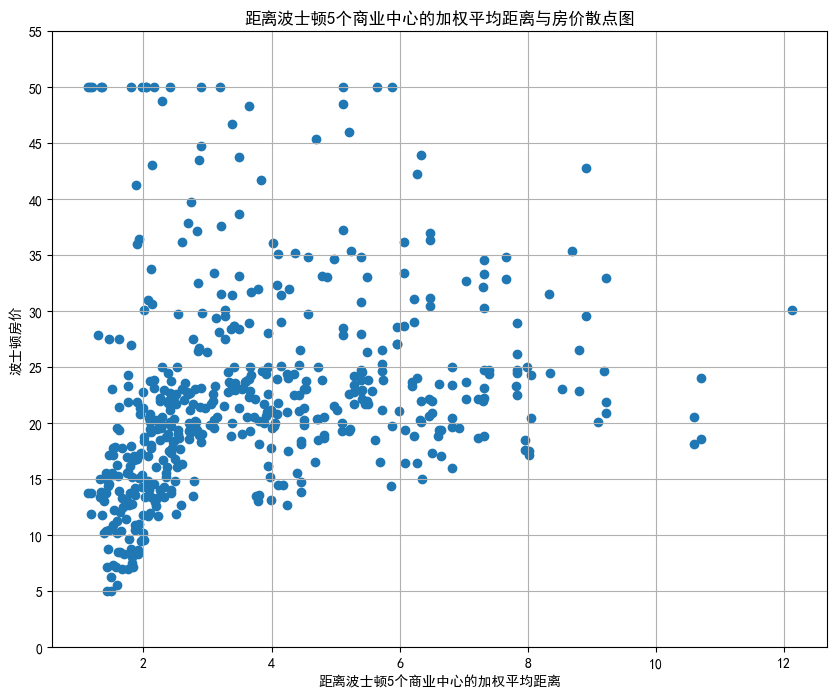

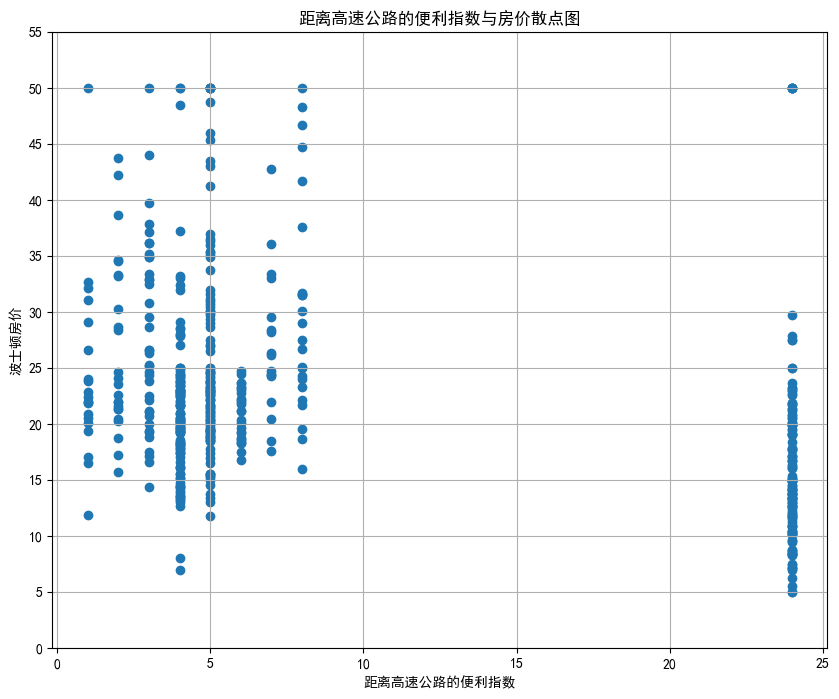

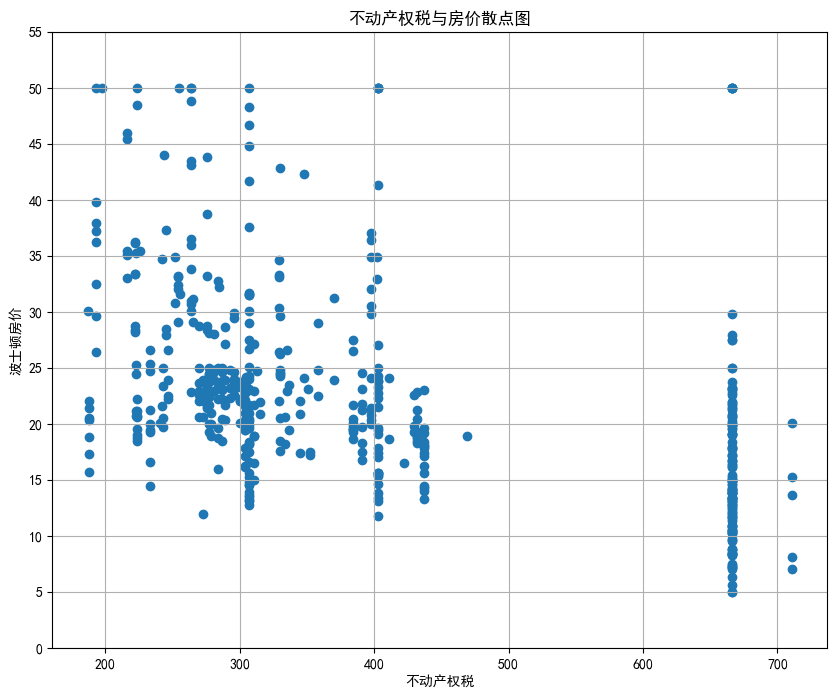

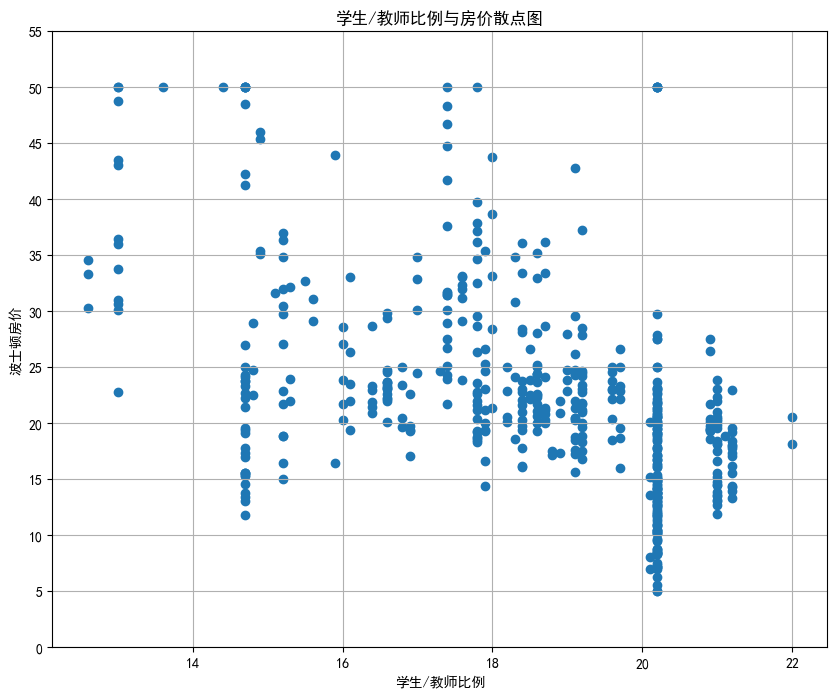

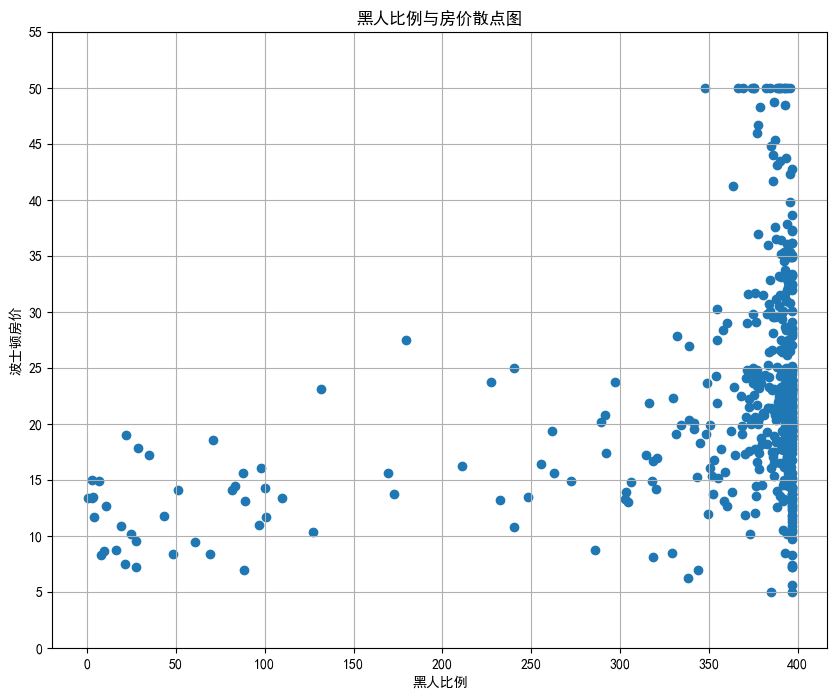

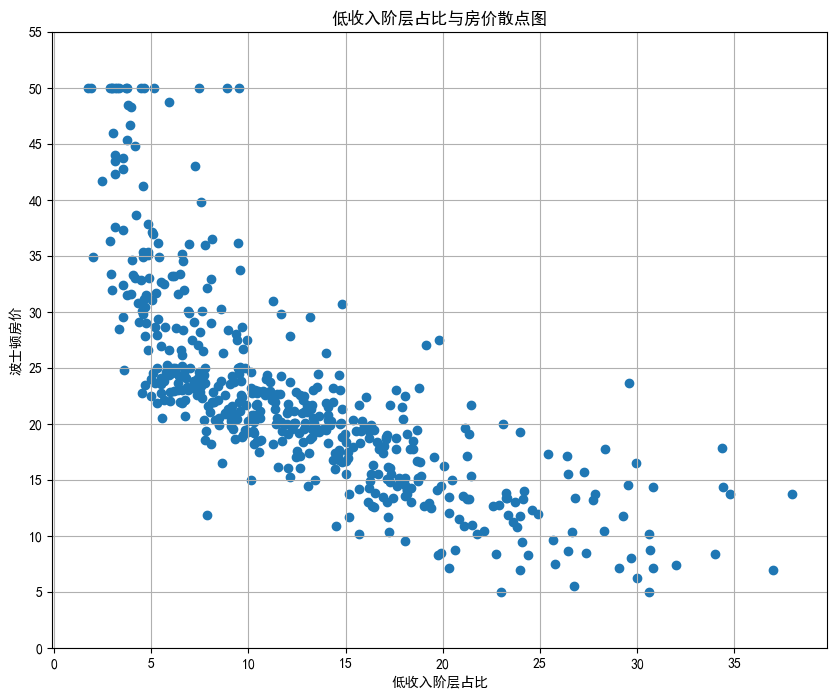

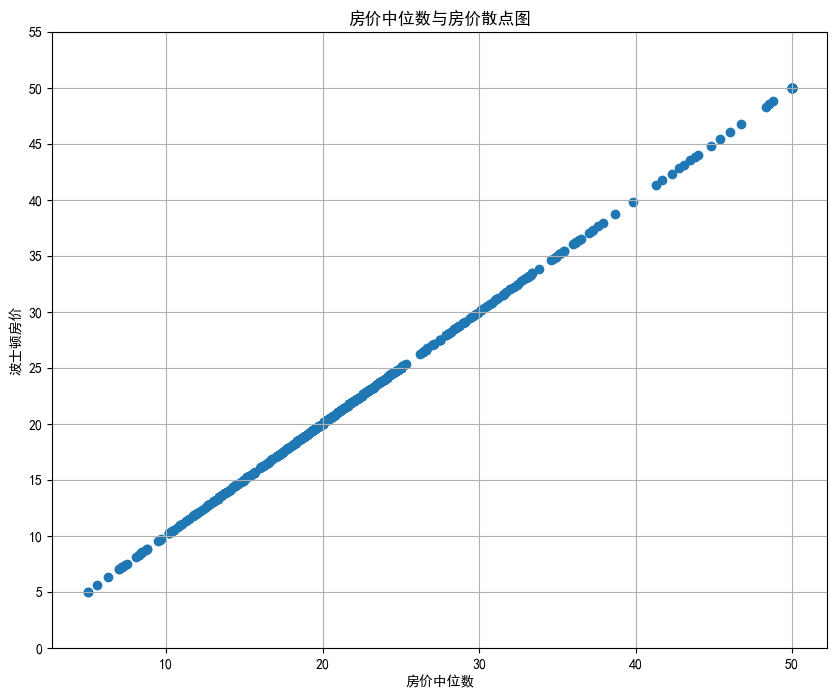

In [189]:
#检查各变量与目标变量的相关强度
for each in df_chinese.columns:
    plt.scatter(df_chinese[each],df_chinese['房价中位数'])
    plt.title('{}与房价散点图'.format(each))
    plt.xlabel(each)
    plt.ylabel('波士顿房价')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()
